# Exploração e limpeza de dados

### Diferentes tipos de problemas da ciência de dados

- problema de regressão

Por exemplo, prever o preço de uma casa. O esperado é que fique perto do preço real

- problema de classificação

Por exemplo, prever uma resposta sim ou não para uma pergunta. O esperado é a resposta correta.

Ambos problemas são chamados de **aprendizado supervisionado**, um tipo de problema que depende de dados rotulados

### DataFrame

DataFrame é uma classe básica do pandas. Funciona como um template para uma estrutura de dados.

Exemplo de um DataFarme:

|    | ID | Sex | Name |
|----|----|-----|------|
| 1  | 001|M    | Pedro|
| 2  | 002|F    | Ana  |

Tabela: *Exemplo de DataFrame do pandas com um ímdice de linha inteiro à esquerda e um índice de coluna na forma de strings*

In [1]:
# Carregando os dados do estudo de caso em um jupyter notebook

## importar pandas

import pandas as pd

In [2]:
# importando o dataset usando o método pd.read_excel

df = pd.read_excel('C:/Users/Renato/Dropbox/pos_usp/usp_data_open/data_science/projetos_de_ciencias_de_dados_com_python/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
# testando a importação do dataset via pandas
# Use o método .info() para ver todas as colunas com os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

# O problema da empresa

Cliente é uma **empresa de cartão de crédito**. O dataset inclui dados demográficos e financeiros recentes (6 últimos meses) de uma amostra de 30.000 titulares.

As linhas são rotuladas de acordo com se no mês seguinte ao período de dados histórico de seis meses um proprietário de conta ficou inadimplente, ou seja, não fez o pagamento mínimo.

# Objetivo

Desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês.

# Etapa de exploração de dados

Algumas etapas úteis para a exploração de dados:  

- saber quantas colunas os dados contêm (características, resposta ou metadados);
- quantas linhas (amostras);
- que tipos de características existem (categóricas (sim/não/talvez) ou númericas);
- qual é a aparência dos dados segundo essas características;
- há dados faltando?
    

## Exercício 3: Verificando a integridade básica dos dados

Utilizando método **[.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)** do pandas. 

```python
DataFrame.columns: Índice
    Os rótulos das colunas do DataFrame.
```



In [4]:
# Verificando a integridade básica dos dados

# Empregar o método .columns do DataFrame para examinar os nomes de todas as colunas.

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Como podemos ver, os nomes de todas as colunas estão listadas na saída acima. 

A coluna IDs de contas são a identificação das contas. 

As outras colunas parecem ser as **características**, com a última coluna sendo a **variável de resposta**.

Resumo das informações do dataset que nos foi dado pela clinte:

- 'ID' - coluna de IDs de contas; 
- 'LIMIT_BAL' - valor do crédito fornecido inclusive o crédito do consumidor individual e familiar (complementar); 
- 'SEX' - gênero (1=masculino; 2=feminino); 
- 'EDUCATION' - instrução (1=pós-graduação; 2=universidade; 3=ensino médio; 4=outros); 
- 'MARRIAGE' - estado civil (1=casado; 2=solteiro; 3=outros), 
- 'AGE' - idade (ano); 
- 'PAY_1'-'PAY_6' - registro de pagamentos passados.  Pagamentos mensais passados, registrados de abril a setembro, são armazenados nessas colunas;
- 'PAY_1' - representa o status de reembolso em setembro;
- 'PAY_2', - status de reembolso em agosto;
- 'PAY_3', - status de reembolso em julho;
- 'PAY_4', - status de reembolso em junho;
- 'PAY_5', - status de reembolso em maio;
- 'PAY_6', - status de reembolso em abril;

A escala de medida do status de reembolso é a seguinte: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento; e assim por diante até 8 = atraso de oito meses no pagamento; 9 = atraso de nove meses ou mais no pagamento.

- 'BILL_AMT1'-'PAY_AMT6', - valorda fatura; 
- 'BILL_AMT1' - representa o valor da fatura em setembro;
- 'BILL_AMT2' - representa o valor da fatura em agosto;
- 'BILL_AMT3' - representa o valor da fatura em julho; 
- 'BILL_AMT4' - representa o valor da fatura em junho; 
- 'BILL_AMT5' - representa o valor da fatura em maio; 
- 'BILL_AMT6' - representa o valor da fatura em abril; 
- 'PAY_AMT1'-'PAY_AMT6' - valor de pagamentos anteriores;
- 'PAY_AMT1' - representa o valor pago em setembro;
- 'PAY_AMT2' - representa o valor pago em agosto; 
- 'PAY_AMT3' - representa o valor pago em julho; 
- 'PAY_AMT4' - representa o valor pago em junho; 
- 'PAY_AMT5' - representa o valor pago em maio; 
- 'PAY_AMT6' - representa o valor pago em abril;
- 'default payment next month'

Notas: 
- **não usaremos os dados de gênero para tomar decisões de solvibilidade devido a cosiderações éticas**;
- valores em [novos dólares taiwaneses](https://en.wikipedia.org/wiki/New_Taiwan_dollar); 

In [5]:
# Use o método .head() para ver as primeiras linhas do DataFrame

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


A coluna ID parece conter identificadores exclusivos. 

Para verificar se isso ocorre realmente em todo o dataset, podemos contar o número de valores exclusivos usando o método **[.nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)** da **série** (ou seja, coluna) ID. 

Primeiro, selecionaremos a coluna usando colchetes.

In [6]:
# descobrindo se há problema de qualidade de dados
# A função pandas .nunique() retorna o número de elementos únicos no objeto.

df['ID'].nunique()

29687

Agora, vamos executar o comando **.shape** para descobrir o número de linhas do dataset

In [7]:
# descobrindo o números de linhas do dataset

df.shape

(30000, 25)

Identificamos que o número de IDs exclusivos é menor do que o número de linhas. Isso significa que o **ID não é um identificador exclusivo** para as linhas de dados.

Sabemos então que há alguma duplicação de IDs. No entanto, em que quantidades? Um único ID está sendo duplicado várias vezes? Quantos IDs estão sendo duplicados?

Podemos usar o método **.value_counts()** na série ID para começar a responder a essas perguntas. 

Ele é semelhante a um procedimento **group by/count** em SQL e listará os IDs exclusivos e a frequência com que ocorrem. 

Executaremos essa operação na próxima etapa e armazenaremos as contagens de valores em uma variável **id_counts**.

In [8]:
# armazene as contagens de valores em uma variável definida como id_counts e exiba os valores armazenados usando o método .head()

id_counts = df['ID'].value_counts()

In [9]:
id_counts.head()

62608fd2-d7fb    2
accba688-8ec1    2
168dcd08-0ed9    2
04299d54-61d4    2
97f74dea-338e    2
Name: ID, dtype: int64

Observe que o **.head()** retorna, por padrão, as cinco primeiras linhas. Podemos especificar o número de itens a serem exibidos passando o número desejado nos parênteses, ().

In [10]:
id_counts.head(20)

62608fd2-d7fb    2
accba688-8ec1    2
168dcd08-0ed9    2
04299d54-61d4    2
97f74dea-338e    2
b44b81b2-7789    2
f9d25524-9d69    2
3511ed92-c434    2
87dec940-75b7    2
b9591d1a-8480    2
91c69d1a-8732    2
6d1fc219-67b0    2
7be61027-a493    2
c5a658d0-92da    2
f63d8fbe-d79e    2
adeed333-dbfd    2
c5368117-b498    2
f31d1048-5fa9    2
2618fdc4-e731    2
f0b963e7-4933    2
Name: ID, dtype: int64

In [11]:
# exiba o número de entradas duplicadas agrupadas executando outra contagem de valores

id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

Na saída acima podemos ver que a maioria dos IDs ocorre exatamente uma única vez, como esperado. 

No entanto, 313 IDs ocorrem duas vezes. Logo, nenhum ID ocorre mais do que duas vezes.

De posse dessas informações, estamos prontos para começar a examinar mais detalhadamente esse problema de qualidade de dados e corrigi-lo. 

Criaremos máscaras booleanas para limpar melhor os dados.

# Máscaras booleanas

Para ajudar a limpar os dados do estudo de caso, usaremos o conceito de **máscara lógica**, também conhecido como **máscara booleana**.

Uma máscara lógica é uma maneira de filtrar um array, ou série (ou seja, coluna), obedecendo alguma condição. 

Por exemplo, podemos usar o operador **==; <; >; <=; >=** para encontrar todos os locais de um array que contêm um valor específico.

A saída dessa comparação é um array com uma série de valores  True/False, também conhecidos como valores **booleanos**. 

Cada elemento da saída corresponderá a um elemento da entrada, com o resultado **True** se a condição for atendida, e **False**, caso não seja.


Para ilustrar como isso funciona, usaremos **dados sintéticos** (dados criados para a exploração ou ilustração de um conceito). 

Primeiro importaremos o pacote NumPy, para gerar números aleatórios.

In [13]:
# importando a biblioteca NumPy

import numpy as np

In [14]:
# usamos seed (semente) no gerador de números aleatórios

np.random.seed(seed=24)

Se definirmos um **seed**, teremos os mesmos resultados enre as execuções do gerador. Caso contrário, isso não é garantido.

Essa pode ser uma opção útil se você usa números aleatórios em seu trabalho e quer ter resultados consistentes sempre que executar um notebook

__________
**Curiosidade**: Veja [porque Computadores NÃO PODEM Gerar Números Aleatórios](https://www.youtube.com/watch?v=LqXnpIn2Uxs) e [como os computadores geram números aleatórios](http://www.cdme.im-uff.mat.br/rdf/rdf-html/rdf-g-br.html).
__________

In [15]:
# geração de 100 inteiros aleatórios, selecinodos entre 1 e 5 (inclusive)

random_integers = np.random.randint(low=1, high=5, size=100)

In [16]:
random_integers

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3,
       4, 4, 2, 4, 2, 4, 1, 1, 3, 1, 4, 2, 2, 1, 4, 3, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 4, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 2, 1, 2, 4, 2, 1, 4, 3,
       1, 2, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 3, 2, 4])

In [17]:
# obtendo os cinco primeiros números

random_integers[:5]

array([3, 4, 1, 4, 2])

Suponhamos que quiséssemos conhecer os locais de todos os elementos de **random_integer igual a 3**. Poderíamos criar uma máscara booleana para fazer isso.

In [18]:
# criando máscara booleana para condições iguais a 3

is_equal_to_3 = random_integers == 3

In [19]:
# obtendo os cinco primeiros resutados

is_equal_to_3[:5]

array([ True, False, False, False, False])

In [20]:
# somando o resultados da máscara booleana

sum(is_equal_to_3)

22

O resultado igual a 22 faz sentido, com uma criação aleátoria igualmente provável de 5 valores possíveis, o esperado é que cada valor apareça 20 % das vezes

In [21]:
# selecionando os elementos do array original que atendem a essa condição

random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Esses são os aspectos básicos dos arrays booleanos, que são úteis em muitas situações. 

Especificamente, você pode usar o método **[.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)** de DataFrames para indexar suas linhas por uma máscara booleana e as colunas por rótulo. 

## Exercício 4 - Continuando a verificação da integridade dos dados

Com o conhecimento dos arrays booleanos, examinaremos alguns dos IDs duplicados que descobrimos.

Já verificamos que nenhum ID aparece mais de duas vezes. 

Podemos usar essa informação para localizar os IDs duplicados e examiná-los. 

Em seguida, tomaremos medidas para remover linhas de qualidade duvidosa do dataset.

In [22]:
# criando máscara booleana para condições iguais a 3

dupe_mask = id_counts == 2

In [23]:
# obtendo os cinco primeiros resutados

dupe_mask[:5]

62608fd2-d7fb    True
accba688-8ec1    True
168dcd08-0ed9    True
04299d54-61d4    True
97f74dea-338e    True
Name: ID, dtype: bool

Aqui, **dupe_mask** é a máscara lógica que criamos para armazenar os valores booleanos.

In [24]:
# acessando o índice de id_count e exibindo as cinco primeiras linhas como contexto usando o comando a seguir

id_counts.index[:5]

Index(['62608fd2-d7fb', 'accba688-8ec1', '168dcd08-0ed9', '04299d54-61d4',
       '97f74dea-338e'],
      dtype='object')

In [25]:
# selecionando e armazenando os IDs duplicados em uma nova variável chamada dupe_ids 

dupe_ids = id_counts.index[dupe_mask]

In [26]:
#exibindo os 15 primeiros ids armazenados

dupe_ids[:15]

Index(['62608fd2-d7fb', 'accba688-8ec1', '168dcd08-0ed9', '04299d54-61d4',
       '97f74dea-338e', 'b44b81b2-7789', 'f9d25524-9d69', '3511ed92-c434',
       '87dec940-75b7', 'b9591d1a-8480', '91c69d1a-8732', '6d1fc219-67b0',
       '7be61027-a493', 'c5a658d0-92da', 'f63d8fbe-d79e'],
      dtype='object')

In [27]:
# convertendo dupe_ids em uma lista e obtendo seu tamanho

dupe_ids = list(dupe_ids)
len(dupe_ids)

313

Alteramos a variável **dupe_ids** para uma **lista**, já que precisamos dela nessa forma em etapas futuras. A lista tem um tamanho igual a 313, como pode ser visto na saída acima, que coincide com o número de IDs duplicados que obtivemos na contagem de valores algumas linhas acima.

In [28]:
# verificando os dados de dupe_ids exibindo as cinco primeiras entradas

dupe_ids[:5]

['62608fd2-d7fb',
 'accba688-8ec1',
 '168dcd08-0ed9',
 '04299d54-61d4',
 '97f74dea-338e']

Agora estamos prontos para examinar os dados dos IDs de nossa lista de duplicatas. Especificamente, queremos examinar os valores das características para ver se há algo de diferente entre essas entradas.

Para isso, usaremos os métodos **[.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)** e **.loc**.

Usando os três primeiros IDs de nossa lista de duplicatas, **dupe_ids[:3]**, primeiro queremos encontrar as linhas que contêm esses IDs. Se passarmos essa lista de IDs para o método **.isin** da série ID, ele criará outra máscara lógica que poderemos usar no DataFrame maior para exibir as linhas que contêm os IDs.

O método **.isin** ficará aninhado em uma instrução **.loc** de indexação do DataFrame para a seleção do local de todas as linhas que contêm 'True' na máscara booleana.

O segundo argumento da instrução de indexação é **.loc** é **:** (dois-pontos), que implica que todas as colunas serão selecionadas. Ao executar as próximas etapas, estaremos basicamente filtrando o DataFrame para visualizar todas as colunas dos três primeiros IDs duplicados.

In [29]:
# executando o comando formulado anteriormente

df.loc[df['ID'].isin(dupe_ids[:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8095,168dcd08-0ed9,360000,2,1,2,28,-1,-1,-1,-1,...,265,265,5862,4045,2043,265,265,5862,1907,0
8195,168dcd08-0ed9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27228,accba688-8ec1,30000,1,2,1,40,Not available,4,3,2,...,13810,14488,13971,0,0,800,1200,0,0,1
27328,accba688-8ec1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28811,62608fd2-d7fb,60000,2,1,2,46,0,0,0,0,...,20732,21196,23175,22000,3000,3000,1000,3000,0,0
28911,62608fd2-d7fb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O que podemos ver aqui é que cada ID duplicado para ter uma linha de dados válidos e outra somente com zeros. Fica claro que devemos excluir as linhas somentes com zeros, já que não faz sentido alguém ter 0 anos, limite de crédito igual a 0 e assim por diante.

Uma abordagem para lidarmos com esse problema seria encontrar as linhas que só tem zeros, exceto na primeira coluna, que tem os IDs. Esses dados seriam inválidos e, se excluíssemos, também resolveríamos nosso problema de IDs duplicados.


In [30]:
# criando uma máscara booleana feature_zero_mask

df_zero_mask = df == 0

Usaremos **df_zero_mask**, que é outro DataFrame, contendo valores booleanos. O objetivo é criarmos uma série booleana, **feature_zero_mask**, que identifique cada linha em que todos os elementos a partir da segunda coluna (as características e a resposta, mas não o IDs) sejam 0.

Para isso, primeiro temos que indexar **df_zero_mask** usando o método de indexação de inteiros (.loc). Nesse método, passaremos (:) para examinar todas as linhas e (1:) para examinar todas as colunas a partir da segunda (ídice 1). Para concluir, aplicaremos o método **all()** ao longo do eixo da coluna (axis=1) e ele retornará **True** somente se todas as colunas dessa linha forem iguais a **True**. 

In [31]:
# criando a série booleana feature_zero_mask

feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [32]:
# calculando a soma da série booleana

sum(feature_zero_mask)

315

Esse número é maior do que o número de IDs duplicados, logo, se excluirmos todas as "linhas de zeros", podemos nos livrar do problema dos IDs duplicados

In [33]:
# impando o DataFrame eliminando as linhas só com zeros, exceto pelo ID

df_clean_1 = df.loc[~feature_zero_mask,:].copy() # operador lógico not (~) para selecionar linhas sem 0 e (:) para selecionar todas as colunas

Agora, temos um novo DataFrame chamado **df_clean_1**.

Observe que usamos o método **.copy()** após a operação de indexação **.loc** para criar uma cópia dessa saída, em vez de visualizarmos o DataFrame original. Podemos considerar essa ação como a criação de um novo DataFrame em vez de referenciarmos o original.

In [34]:
# verificando o número de linhas e colunas do novo DataFrame

df_clean_1.shape

(29685, 25)

In [35]:
# Obtendo o número de IDs exclusivos executando este código

df_clean_1['ID'].nunique()  # A função pandas .nunique() retorna o número de elementos únicos no objeto.

29685

Agora observamos que o números de IDs exclusivos é igual ao número de linhas.

## Exercício 5 - Explorando e limpando os dados

Até agora, identificamos um problema de qualidade de dados relacionados aos metadados: fomos informados de que cada amostra de nosso dataset corresponderia a um ID de conta exclusivo, o que não ocorreu.

Conseguimos usar a indexação lógica e o pandas para resolver o problema. 

Estamos pronto para começar a examinar os valores das características e da resposta, os dados que usaremos para desenvolver nosso modelo preditivo. 

In [36]:
# obtendo o tipo de dado das colunas do dataset usando o método .info()

df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

Podemos ver que há 25 colunas. Cada linha tem 29.685 valores **não nulos**. Isso indicaria que não há dados ausentes, já que cada célula contém algum valor.

No entanto, se houver um valor de preenchimento para representar dados ausentes, ele não ficaria evidente aqui.

Também vemos que a maioria das colunas são tipo **int64** (dado integer), as exceções são **ID** e **PAY_1**. **ID** já sabemos que contém string. E **PAY_1**??

In [37]:
# use método .head(n) do pandas para visualzar as n linhas superiores da série PAY_1

df_clean_1['PAY_1'].head(15)

0      2
1     -1
2      0
3      0
4     -1
5      0
6      0
7      0
8      0
9     -2
10     0
11    -1
12    -1
13     1
14     0
Name: PAY_1, dtype: object

Os inteiros a esquerda são os índices. Os dados da coluna **PAY_1** (à direita) são o status de pagamento da fatura mensal mais recente, usando os valores -1,1,2,3 e assim por diante.

De acordo com o dicionário de dados, "A escala de medida do status de reembolso é: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses; ...; 9 = atraso de 9 meses ou mais no pagamento". Então, o que é o 0 (zero)?

In [38]:
# Fazendo um exame mais detalhado na coluna PAY_1

# Obtendo as contagens de valores da coluna PAY_1 usando o método .value_counts()

df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

A saída acima revela a presença de dois valores não documentados, 0 e -2, e também a razão de essa coluna ter sido importada pelo pandas como um tipo de dado **object** em vez de **int64**. Há uma string **Not Available** presente na coluna, simbolizando dados ausentes. 

Posteriormente, retornaremos nesse assunto quando considerarmos como lidar com dados ausentes. Por enquanto, removeremos as linhas do dataset nas quais a característica tem um valor ausente.

In [39]:
# usando máscara lógica (!=) para encontrar todas as linhas que não têm dados ausentes para PAY_1

valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [40]:
valid_pay_1_mask[:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [41]:
# verificando quantas linhas não têm dados ausentes usando a soma da máscara

sum(valid_pay_1_mask)

26664

In [42]:
# limpando os dados eliminando as linhas de PAY_1 com valores ausentes

df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [43]:
# obtendo a dimensão dos dados limpos

df_clean_2.shape

(26664, 25)

Por fim, para que o tipo de dado dessa coluna seja consistente com os outros, vamos convertê-lo do tipo genérico **object** para **int64** usando o método **.astype**.

O método DataFrame.astype() é usado para lançar um objeto pandas para um type especificado. 

A função **astype()** também fornece a capacidade de **converter qualquer coluna existente adequada em tipo categórico**. Veja documentação [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [44]:
# convertendo tipo de dado de PAY_1 de object para int64

df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [45]:
# exibindo metadados das colunas PAY_1 e PAY_2

df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


# Pronto! Concluimos a segunda operação de limpeza de dados!

No entanto, devemos lembrar de que durante o processo também notamos os valores não documentados -2 e 0 em **PAY_1**.

Suponhamos que entrássemos em contato novamente com a empresa e nos fosse dada a seguinte informação:

- -2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado;
- -1 significa que a conta usou um valor que foi totalmente pago;
- 0 significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago (isto é, uma parcela do saldo devedor foi transportada para o próximo mês).

Essas novas informações esclarecem nossas dúvidas.

## Explorando e garantia da qualidade dos dados

Até agora resolvemos 2 problemas de qualidade dos dados apenas fazendo perguntas básicas ou examinando o resumo de **.info()**.

Examinaremos agora as primeiras colunas.

Antes de chegarmos no histórico de pagamento de fatura, temos os limites de créditos das contas em **LIMIT_BAL** e as características demográficas **SEX**, **EDUCATION**, **MARRIAGE** e **AGE**.

O SÓCIO DA EMPRESA NOS PROCUROU PARA INFORMAR QUE O GÊNERO NÃO DEVE SER USADO PARA PREVISÃO DE SOLVIBILIDADE, JÁ QUE POR SEUS PADRÕES SERIA **ANTIÉTICO**. (*legal :), onde encontro referências sobre ética em análise de dados?*)

Para explorar melhor os dados, usaremos **histogramas**. Para isso, usaremos a biblioteca **Matplotlib**.

## Exercício 6 - Explorando o limite de crédito e as caracterísitcas demográficas

Vamos obter sínteses estatísticas para verificar se os dados contidos nessas características são aceitáveis.

**LIMIT_BAL** e **AGE** são características numéricas, o que siginifica que são medidas em uma escala contínua.  

Consequentemente, usaremos histogramas para visualizá-las.

In [46]:
# importando o matplotlib e definindo algumas opções de plotagem

import matplotlib.pyplot as plt # importa o pacote de plotagem

# renderiza a plotagem autmaticamente
%matplotlib inline

import matplotlib as mpl # recurso adicional de plotagem

mpl.rcParams['figure.dpi'] = 400 # figuras em alta resolução

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

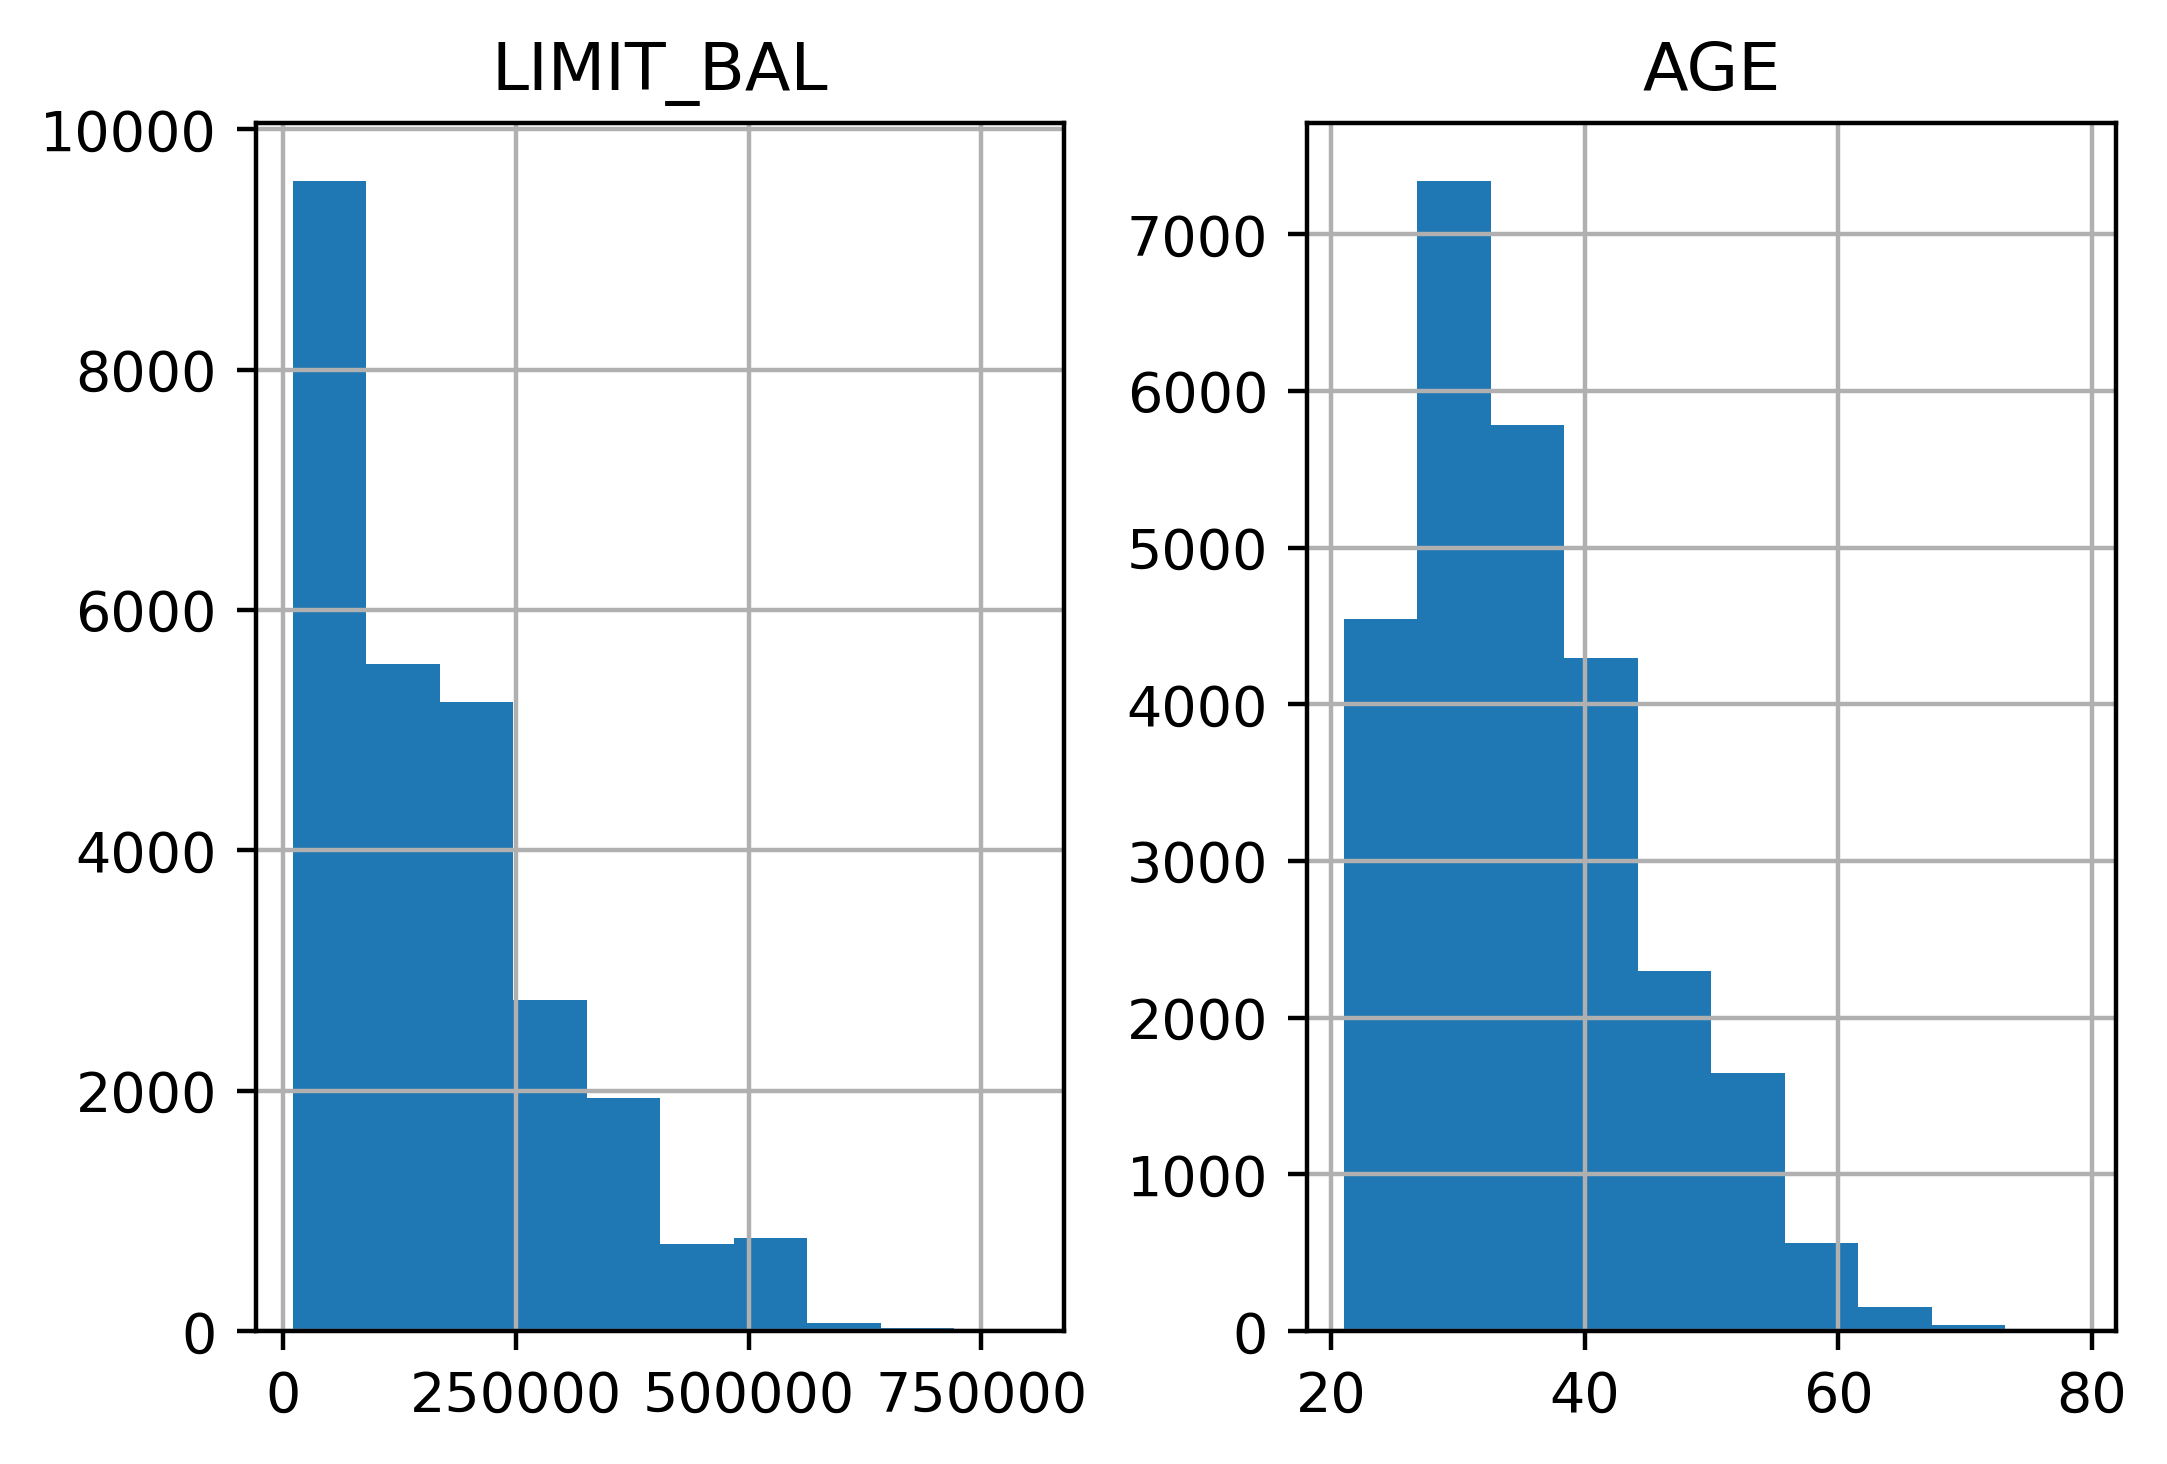

In [47]:
# executando df_clean_2[['LIMIT_BAL', 'AGE']].hist() para ver os histogramas 

df_clean_2[['LIMIT_BAL', 'AGE']].hist()

Podemos obter uma rápida visualização aproximada de todos os dados dessa forma. 

Para vermos sínteses estatísticas, como a média e a mediana, há outra função útil do pandas.

In [48]:
# gerando um relatório tabular de síntese estatística

df_clean_2[['LIMIT_BAL', 'AGE']].describe()              # em R usa-se o método summary

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


**LIMIT_BAL**, o limite de crédito, parece fazer sentido. Os limites de crédito têm um valor mínimo igual a 10.000.

A característica **AGE** também parece bem distribuída, com ninguém com idade abaixo de 21 anos possuindo uma conta de crédito.

Para as características categóricas, é útil verificar as contagens de valores, já que há relativamente poucos valores exclusivos.


# Obtendo as contagens de valores da característica EDUCATION



In [49]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Aqui vemos os graus de instrução não documentados 0, 5 e 6.

O sócio da empresa disse que não conhece os outros graus. Já que eles não são predominantes, vamos agrupá-los na categoria 'outros' (4=outros), que parece apropriada, claro que com o consentimento de nosso cliente.

In [50]:
# combinando os graus não documentados da característica EDUCATION com o grau 'outros'

df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [51]:
# obtendo novamente as contagens de valores da característica EDUCATION

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

O método **.raplace** do pandas ajuda a fazermos rapidamente as substituições descritas na etapa anterior.

Observe que fizemos essa alteração **in loco** (```inplace=True```). Isso significa que, em vez de retornar um novo DataFrame, a operação fará a alteração no DataFrame existente.

In [52]:
# obtendo as contagens de valores da características MARRIAGE

df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Aqui o problema é semelhante ao encontrado na característica EDUCATION; há um valor 0 que não está documentado no dicionário de dados. Então, vamos agrupá-lo com 'outros' (3).

In [53]:
# alterando os valores 0 da característica MARRIAGE para 3

df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [54]:
# obtendo novamente as contagens de valores da característica MARRIAGE

df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Fizemos uma extensa exploração e limpeza dos dados. Agora, executaremos operações mais avançadas de visualizações e exploração das características de histórico financeiro, que vêm depois disso no DataFrame.

### Aprofundamento nas características categóricas

Ler pág. 48 e 49

Explicação importante sobre características ordinais e como podem ou não funcionar bem em um modelo linear.

Vejamos o exemplo do nosso DataFrame

Text(0.5, 0, 'Education level: ordinal enconding')

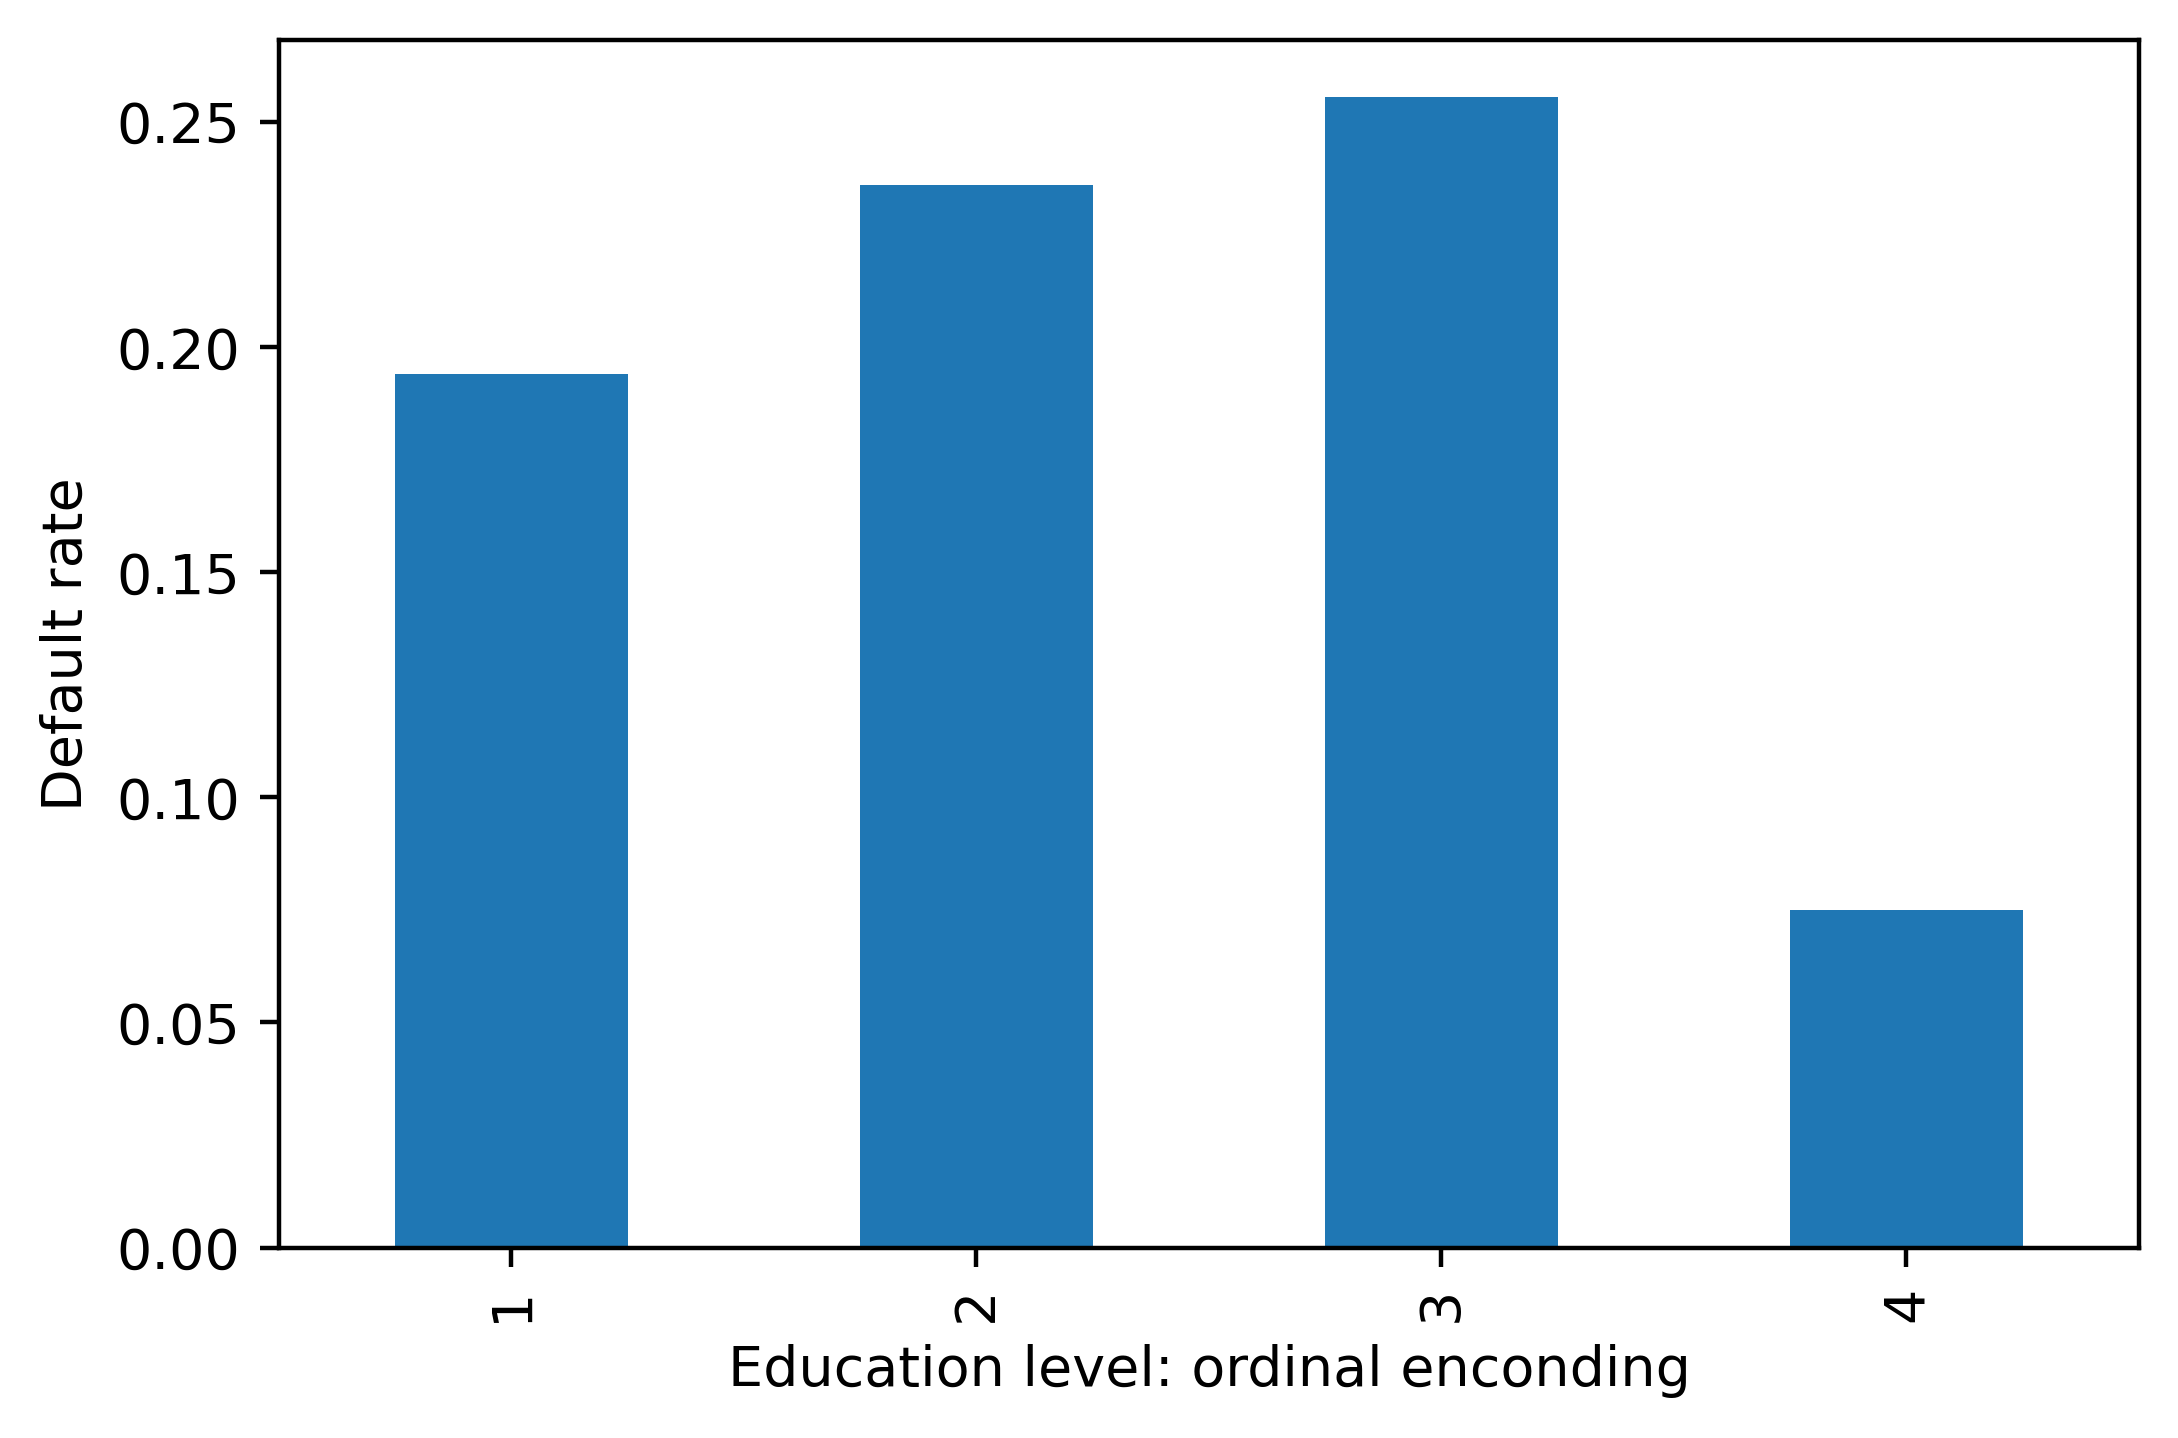

In [55]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)

plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal enconding')

Como descritos nos exemplos do livro, aqui parece que um ajuste de linha reta não seria a melhor descrição dos dados.

**Caso uma característica tenha um efeito não linear como esse, pode ser melhor usar algoritmo mais complexo como uma** ÁRVEORE DE DECISÃO **ou** FLORESTA ALEATÓRIA.

Ou, se um modelo linear mais simples e interpretável como a regressão logística for desejado, poderíamos evitar uma codificação ordinal e usar uma maneira diferente de codificar variáveis categóricas. 

Uma maneira popular de fazer isso se chama **[codificação one-hot](https://en.wikipedia.org/wiki/One-hot)** (*OHE, one-hot encoding*)

O **OHE** é uma maneira de transformarmos uma característica categórica, que pode ser composta de rótulos de texto nos dados brutos, em uma característica numérica que possa ser usada em modelos matemáticos.

_________
Exemplo de Implementação de OHE:

<img src="OHE.png">

[Fonte](https://en.wikipedia.org/wiki/One-hot)
________

## Exercício 7 - Implementando a OHE para uma característica categórica

Neste exercício, executaremos uma **engenharia reversa** na característica EDUCATION do dataset para obter os rótulos de texto que represenam os diferentes graus de instrução e mostraremos como usar o pandas ara criar uma **OHE**.

Primeiro, consideraremos nossa característica EDUCATION, antes de ela ser codificada como um ordinal. Precisamos criar uma nova série (coluna) que tenha dados (strings) em vez de números.



In [56]:
# criando nova coluna (vazia) para os rótulos categóricos chamada EDUCATION_CAT

df_clean_2['EDUCATION_CAT'] = 'none'

In [57]:
# examine as primeiras linhas do DataFrame referentes às colunas EDUCATION e EDUCATION_CAT

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(15)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


Agora precisamos mapear os valores de uma série para a outra. Uma função do pandas conveniente para fazer isso é **[.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)**, que usa um dicionário para estabelecer a correspondência entre os valores antigos e novos.

In [58]:
# criando um dicionário que descreve o mapeamento das categorias de instrução

cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

In [59]:
# aplicando o mapeamento à coluna EDUCATION original usando .map e atribuindo o resultado à nova coluna EDUCATION_CAT

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [60]:
# examinando novamente as primeiras linhas do DataFrame referentes às colunas EDUCATION e EDUCATION_CAT

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(15)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


Agora estamos prontos para a codificação **one-hot**. 

Podemos executá-la passando uma série (Series) de um DataFrame para a função **[get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)** do pandas. 

A função recebeu esse nome porque as colunas de codificação **one-hot** também são chamadas de **variáveis dummy**.

O resutlado será um novo DataFrame, com um número igual de colunas e níveis da variável categórica.

In [61]:
# executando a estratégia acima para criar um DataFrame de codificação one_hot da coluna EDUCATION_CAT

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])

In [62]:
# examinando as primeiras linhas do DataFrame referentes à coluna EDUCATION_CAT

edu_ohe.head(15)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


A saída acima deixa claro porque esta abordagem se chama **codificação one-hot**: em todas as colunas, qualquer linha específica terá um número 1 em exatamente 1 coluna e zeros nas outras.

Em uma linha específica, a coluna com 1 deve corresponder ao nível da variável categórica original. Para verificar isso, precisamos concatenar esse novo DataFrame com o original e examinar os resultados lado a lado.



In [63]:
# concatenando o DataFrame de codificação one-hot com o original 

df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)


In [64]:
# examinando as primeiras linhas do DataFrame concatenado

df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(15)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


Agora é um bom momento para salvarmos o DataFrame criado aqui, que resume nossos esforços de limpar os dados e adicionar uma coluna OHE.

In [65]:
# salvando DataFrame em um arquivo CSV

df_with_ohe.to_csv('C:/Users/Renato/Dropbox/pos_usp/usp_data_open/data_science/projetos_de_ciencias_de_dados_com_python/Data/Chapter_1_cleaned_data.csv', index=False)


# Explorando as características de histórico financeiro do dataset

Estamos prontos para explorar o resto das características do dataset do estudo de caso.

Primeiro, carregaremos o DataFrame salvo acima.

In [66]:
# carregando DataFrame a partir do arquivo CSV

df = pd.read_csv('C:/Users/Renato/Dropbox/pos_usp/usp_data_open/data_science/projetos_de_ciencias_de_dados_com_python/Data/Chapter_1_cleaned_data.csv')

In [67]:
# verificações do DataFrame

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [68]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [69]:
df.shape

(26664, 30)

As características que faltam serem examinadas são as de histórico financeiro. 

Elas se encaixam em 3 grupos: 

* status dos pagamentos mensais nos últimos seis meses 
* as quantias cobradas 
* e as pagas no mesmo período.

Primeiro examinaremos o status dos pagamentos. É conveniente relacioná-los em uma lista para podermos estudá-los em conjunto.

In [70]:
# Relacionando séries (colunas) em uma lista pra estudá-las

pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Podemos usar o método **.describe** nessas seis séries para examinar sínteses estatísticas:

In [71]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Aqui podemos notar que o intervalo de valores é o mesmo para todas as características: -2, -1, 0, ... 8.

Parece que o número 9 (atraso de nove meses ou mais no pagamento) nunca aconteceu.

Agora examinaremos novamente as contagens de valores de PAY_1, dessa vez classificada pelos valores que estamos contando, que são os índice desta série:

In [72]:
# contando valores de PAY_1

df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

Como vimos anteriormente, um historiograma é uma boa maneira de obtermos uma interpretação visual rápida do mesmo tipo de informações que obteríamos com tabelas de contagens de valores.

<AxesSubplot:>

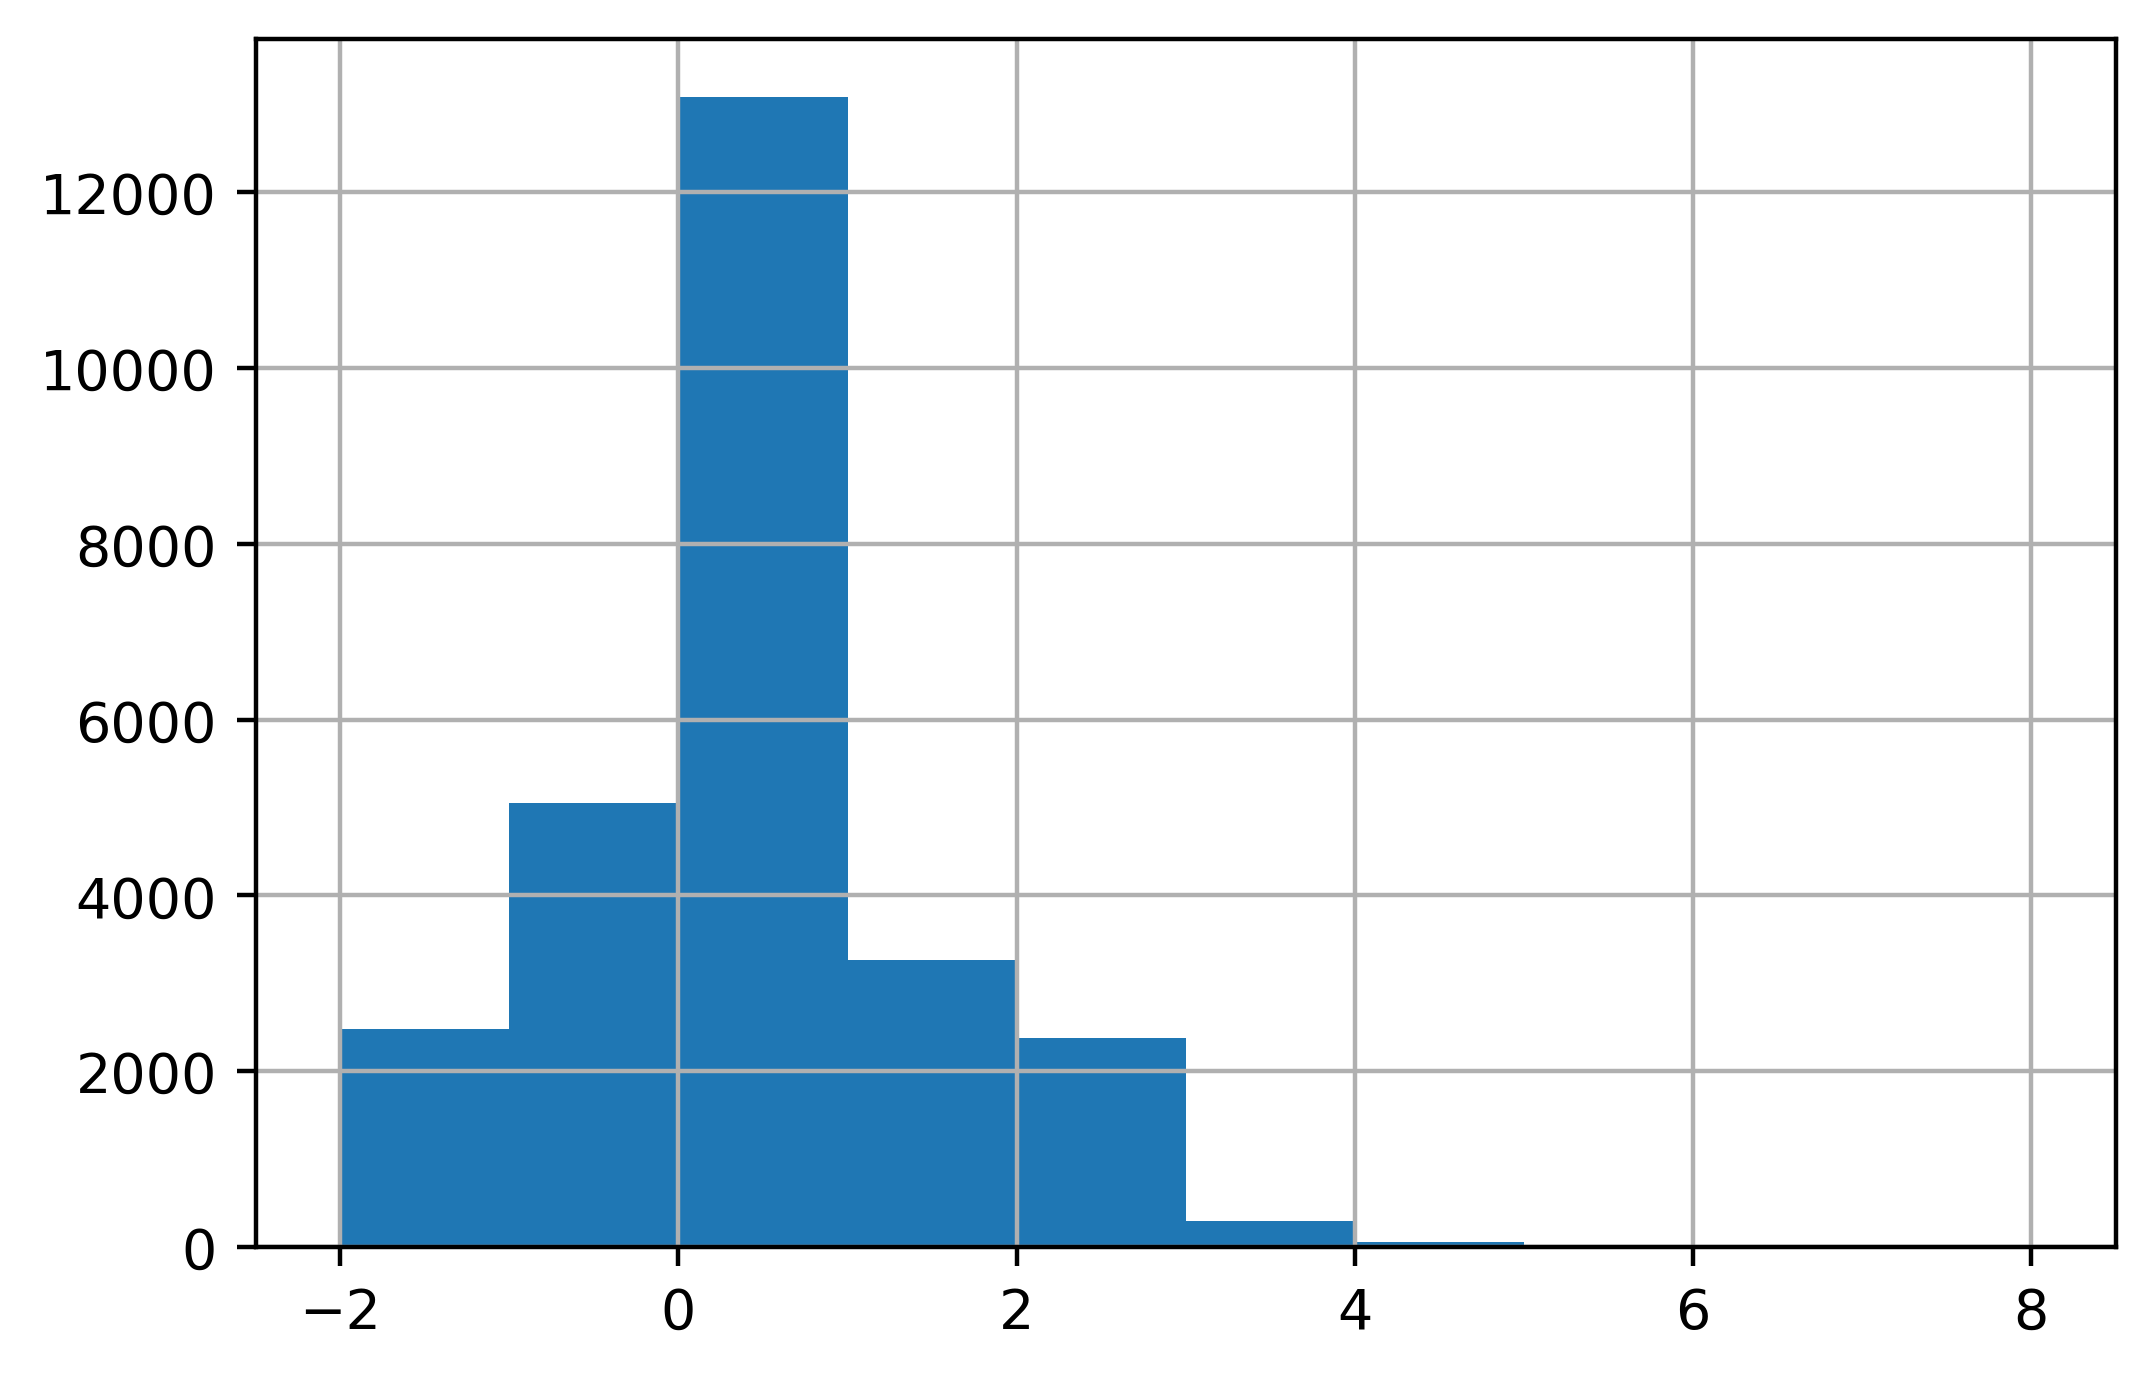

In [73]:
df[pay_feats[0]].hist()

Para obter mais informações sobre **.hist()**, acesse documentação pandas [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) ou documentação matplotlib [aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

# Números de bins

Os historigramas funcionam agrupando valores no que chamamos de **bins** (o número de bins é o número de barras verticais que compõem a plotagem discreta do histograma que vemos).

Se houver uma grande quantidade de valores exclusivos em uma escala contínua, como no histograma de faixas etárias que visualizamos anteriomente, a plotagem do histograma funcionará relativamente bem.

No entanto, quando o número de valores exclusivos é quase igual ao número de bins, os resultados podem ser duvidosos. O número padrão de bins é 10, enquanto, na característica **PAY_1**, há 11 valores exclusivos.

Em casos como este, **é melhor definir manualmente o número de bins** do histograma para que ele seja igual ao número de valores exclusivos.


### Bordas dos bins

Os locais das bordas dos bins determinam como os valores foram agrupados no histograma.

É importante entendermos a maneira como os valores são agrupados nos bins no **matplotlib**, com o uso dos locais das bordas. 

Todos os bins, exceto o último, agrupam valores tão baixos quanto os da borda esquerda e que vão até, **mas sem incluir**, valores tão altos quanto os da borda direita. (*Funciona como [1:5] - seleciona o índice 1 até o 5 (sem incluí-lo*)

Em outras palavras, **a borda esquerda é fechada, mas a direita é aberta**.

Para termos controle sobre a aparência da plotagem, em geral é melhor especificar os locais das bordas dos bins. Criaremos um array de 12 números, que resultará em 11 bins, dedicados a cada um dos valores exclusivos de **PAY_1**:

In [74]:
# Especificando as bordas dos bins do histograma

pay_1_bins = np.array(range(-2,10)) - 0.5

In [75]:
# Visualizando as bordas dos bins do histograma

pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Como última observação sobre o estilo, é importante sempre **rotular suas plotagens** para que elas sejam interpretáveis.

Text(0, 0.5, 'Number of accounts')

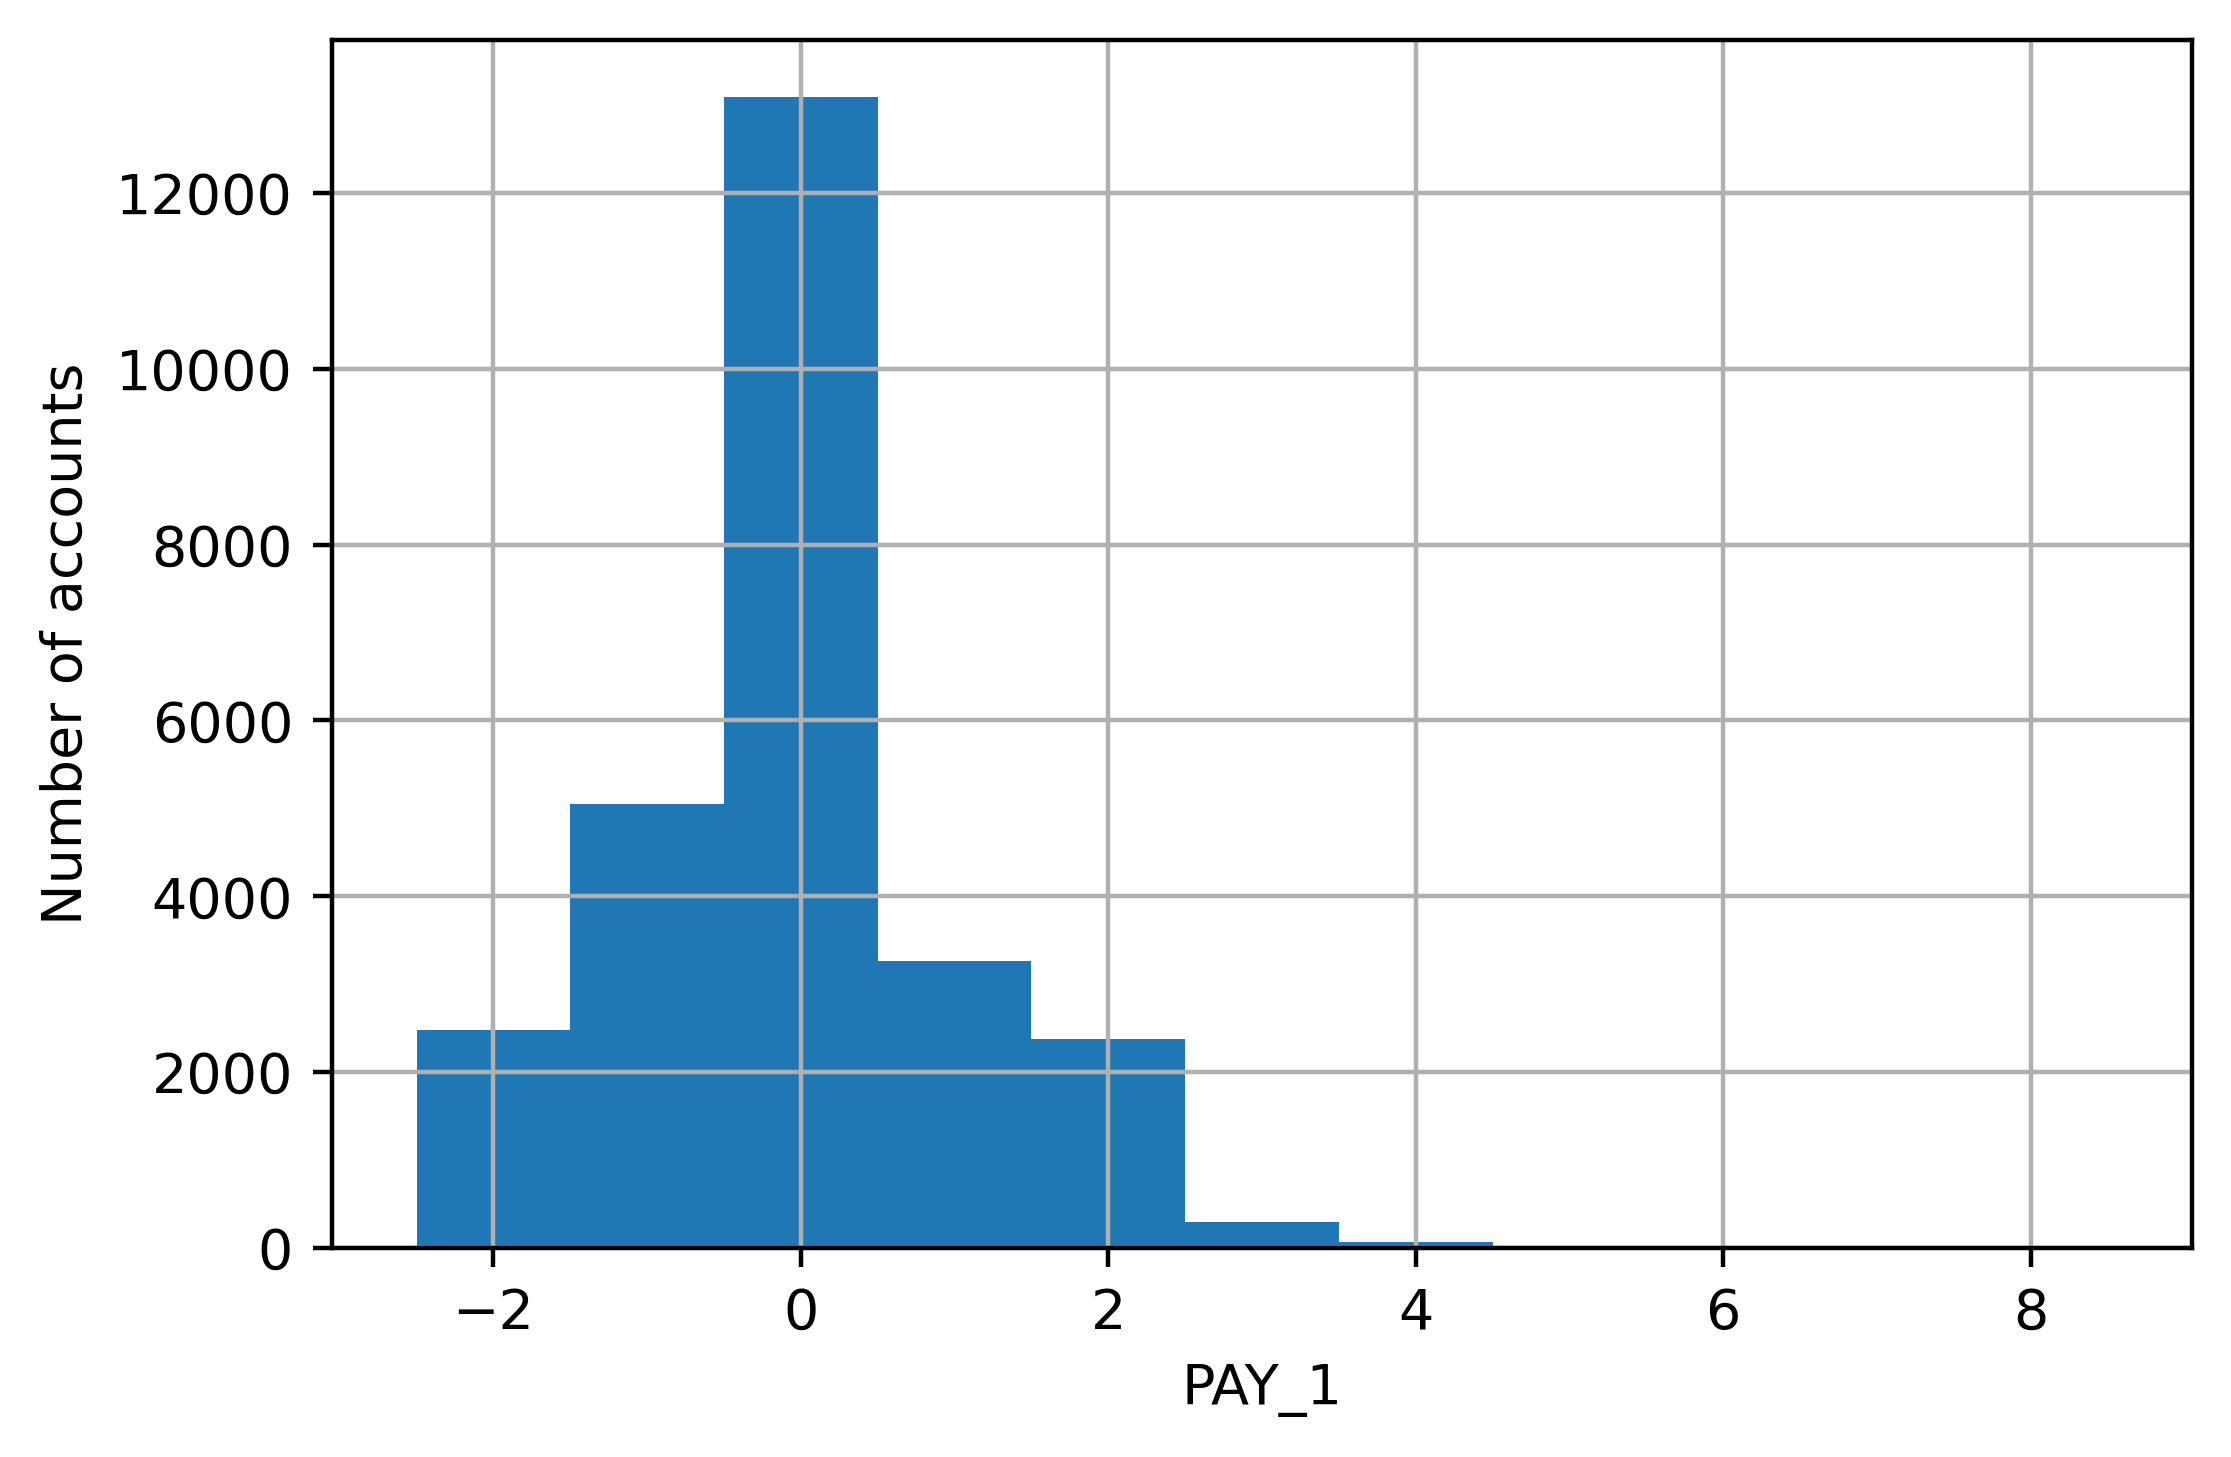

In [76]:
# Um histograma melhor para PAY_1

df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

Embora seja tentador chamar as funções de plotagem com os argumentos padrão, uma das funções de um cientista de dados é criar **visualizações de dados precisas e representativas**.

Como vimos nas contagens de valores, essa visualização confirma que a maioria das contas está em boa situação (valores -2, -1 e 0).

Examinar a distribuição das características e verificar se ela parece razoável é algo bom para se confirmar com o cliente, já que a qualidade desses dados formará a base da modelagem preditiva que você pretende executar.

Agora que estabelecemos um bom estilo de plotagem para os historiogramas, usaremos o pandas para plotar vários histogramas em conjunto e visualizar as características de status de pagamento paracada um dos últimos seis meses.

Podemos passar nossa lista de nomes de colunas **pay_feats** para acessar várias colunas a serem plotadas com o método **.hist()**, especificando as bordas de bins que já determinamos e indicando que gostaríamos de uma grade de plotagens 2 por 3.

Primeiro definiremos um tamanho de fonte suficientemente pequeno para caber entre essas **subplotagens**.

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

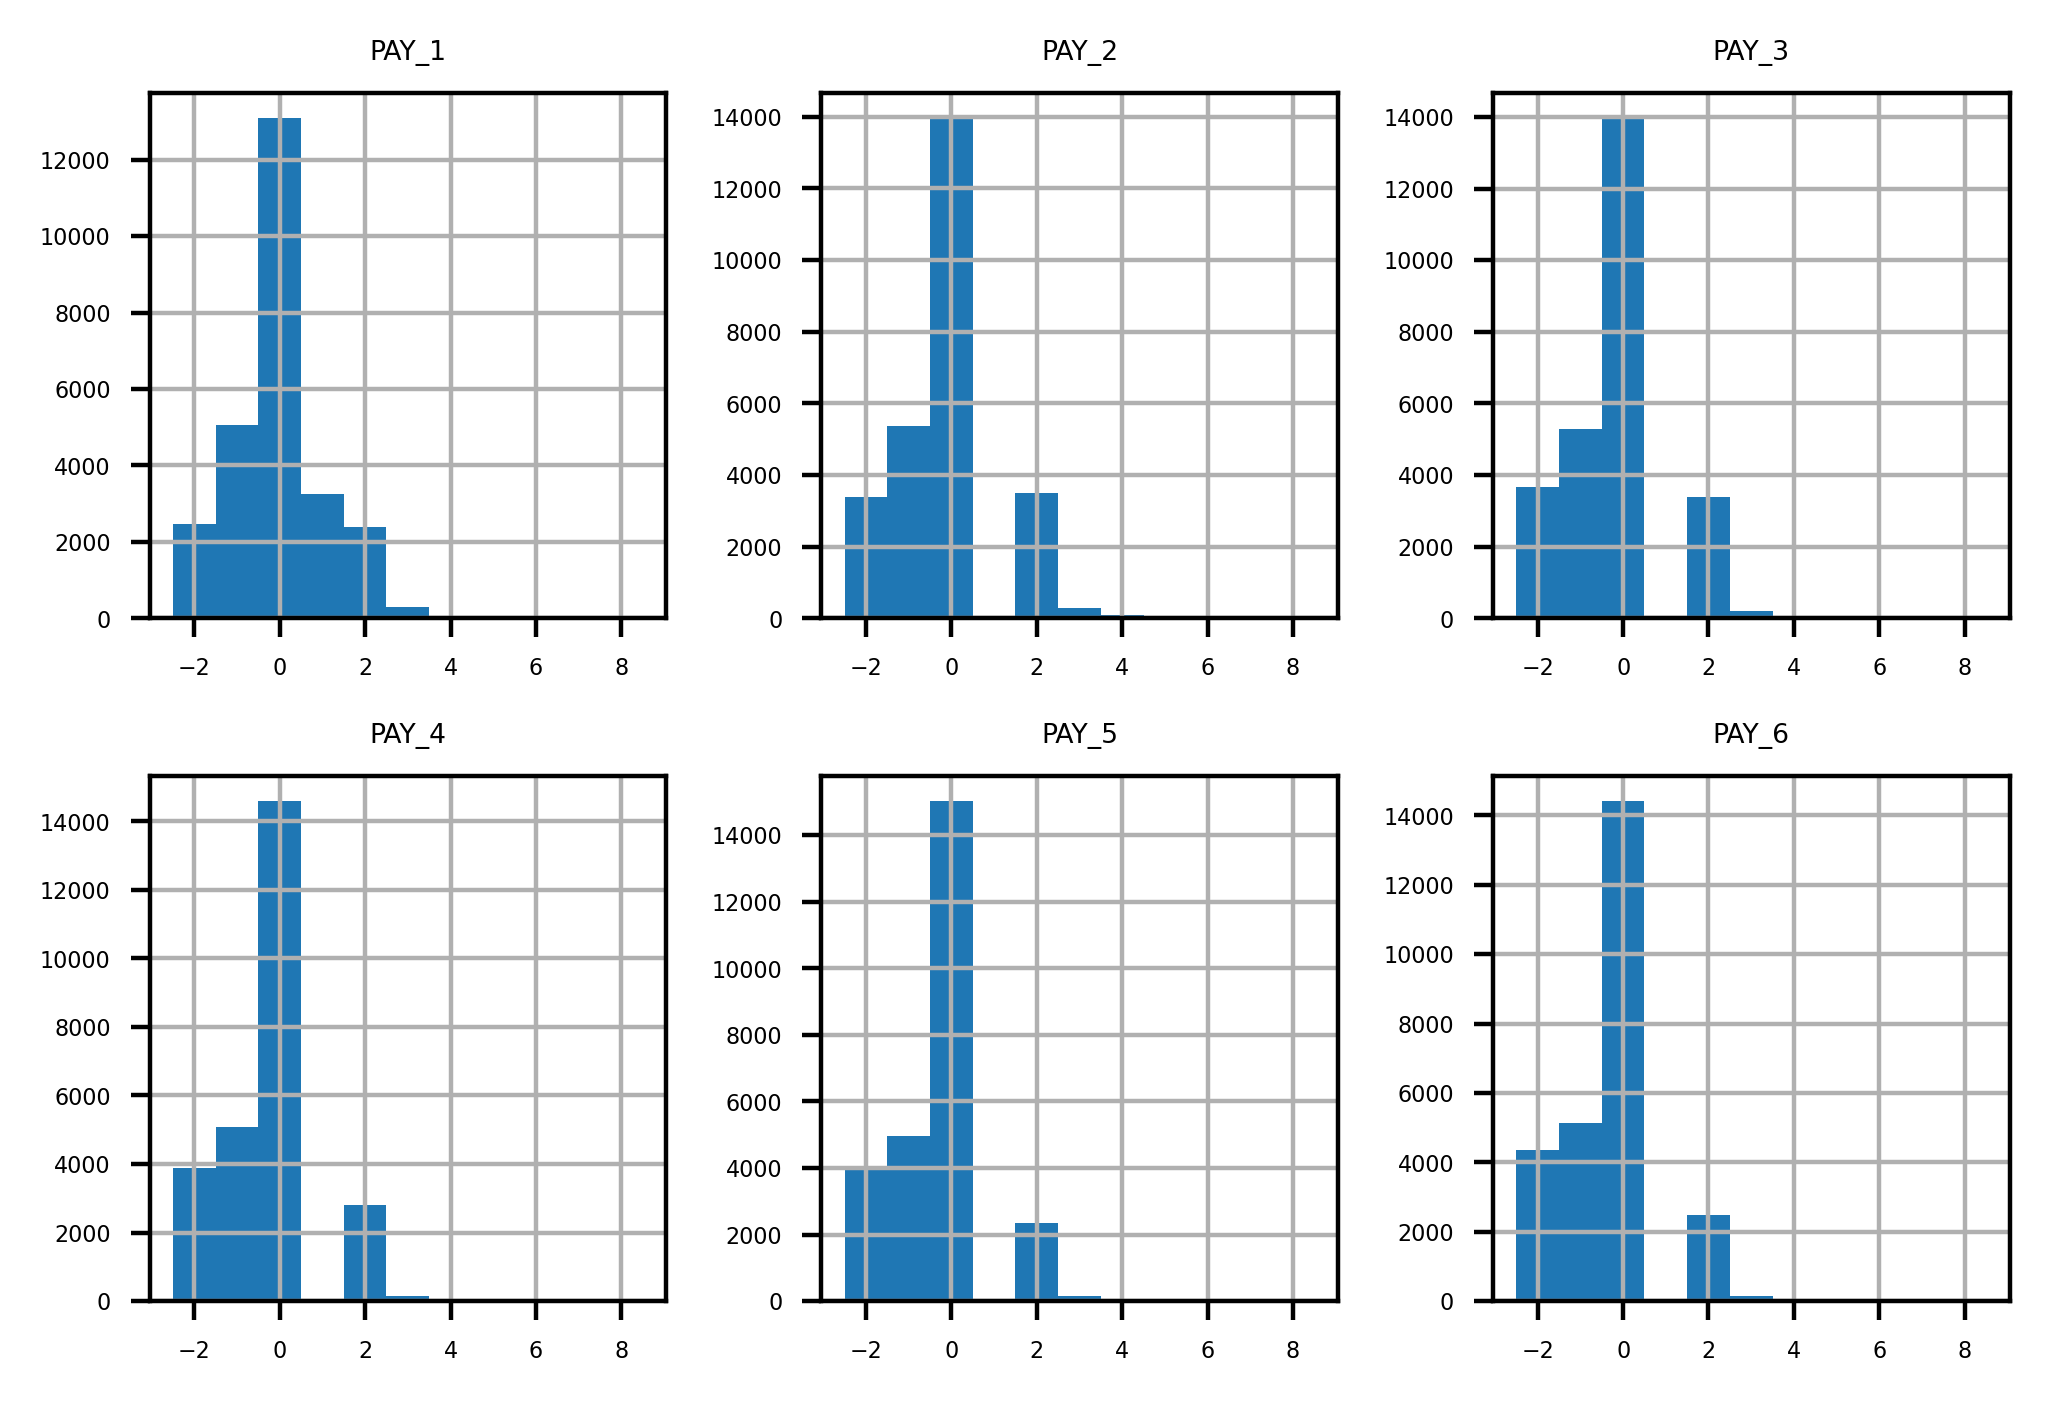

In [77]:
# aqui está o código que fará o que foi descrito acima

mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2, 3))

Ops!

Algo não está certo aqui. considere os valores entre julho (PAY_3) e agosto (PAY_2). Em julho, pouscas contas tiveram atraso de 1 mês no pagamento. No entanto, em agosto, repentinamente há milhares de contas com atraso de 2 meses no pagamento.

Isso não faz sentido: o número de contas com atraso de 2 meses em um mês específico deveria ser menor ou igual ao número de contas com atraso de 1 mês no mês anterior.

Precisamos examinar com mais detalhes as contas com atraso de 2 meses em agosto para vermos qual foi o status de pagamento em julho.

Para isso, usaremos uma máscara booleana e **.loc**:

In [78]:
# status de pagamento em julho (PAY_3) de contas com atraso de 2 meses no pagamento em agosto (PAY_2)

df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Na saída acima fica claro que as contas com atraso de 2 meses em agosto têm valores absurdos para o status de pagamento de julho (a única maneira de chegarmos a 2 meses sem pagamento é atrasando primeiramente 1 mês).

Quando isso acontence, temos que verificar a lógica da consulta usada para criar o dataset ou entrar em contato com a pessoa que o forneceu.

**Resposta do cliente:**

Ocorreu um problema para obter dados do último mês. Isso gerou relatórios incorretos para contas que têm atraso de 1 mês no pagamento.

Logo, em nosso dataset, o valor 1 foi subnotificado em todos os meses exceto setembro (a característica PAY_1).

**Portanto**, só o mês mais recente de nossos dados de status de pagamento está correto. Isso significa que, de todas as características de status de pagamento, só PAY_1 é representativa de dados futuros, aqueles que serão usados para fazermos previsões com o modelo que desenvolvemos.

**ESSE É UM PONTO-CHAVE**: um modelo preditivo depende da obtenção do mesmo tipo de dado para fazer as previsões para as quais foir treinado.

Ou seja, podemos usar PAY_1 como característica em nosso modelo, mas não PAY_2 ou as outras características de status de pagamento de meses anteriores.

Isso mostra a importância de uma verificação abrangente da qualidade dos dados.

# Atividade 1: Explorando as características financeiras restantes do dataset

Examinar as características financeiras restantes de maneira semelhante a como examinamos PAY_1, PAY_2 e assim por diante.

As características financeiras restantes são:

- 'BILL_AMT1'-'PAY_AMT6', - valor da fatura; 
- 'BILL_AMT1' - representa o valor da fatura em setembro;
- 'BILL_AMT2' - representa o valor da fatura em agosto;
- 'BILL_AMT3' - representa o valor da fatura em julho; 
- 'BILL_AMT4' - representa o valor da fatura em junho; 
- 'BILL_AMT5' - representa o valor da fatura em maio; 
- 'BILL_AMT6' - representa o valor da fatura em abril; 

- 'PAY_AMT1'-'PAY_AMT6' - valor de pagamentos anteriores;
- 'PAY_AMT1' - representa o valor pago em setembro;
- 'PAY_AMT2' - representa o valor pago em agosto; 
- 'PAY_AMT3' - representa o valor pago em julho; 
- 'PAY_AMT4' - representa o valor pago em junho; 
- 'PAY_AMT5' - representa o valor pago em maio; 
- 'PAY_AMT6' - representa o valor pago em abril;
- 'default payment next month'

In [83]:
# 1 - crie listas com nomes para as características financeiras restantes

bill_list = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
previous_pay_list = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [84]:
# testando linha acima
bill_list

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [85]:
# 2 - use .describe() para examinar as sínteses estatísticas das características de valor da fatura. 
# Reflita sobre o que viu. Faz sentido?

df[bill_list].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Valores de faturas negativos?

In [95]:
# 3. visualize as características de valor da fatura usando uma grade 2 x 3 de plotagens de histograma
# dica: use 20 bins para essa visualização

pay_2_bins = np.array(range(-2,19)) - 0.5    # criando array com de 21 números que resultará em 20 bins

pay_2_bins                              # visualizando tamanho do array


array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5])

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

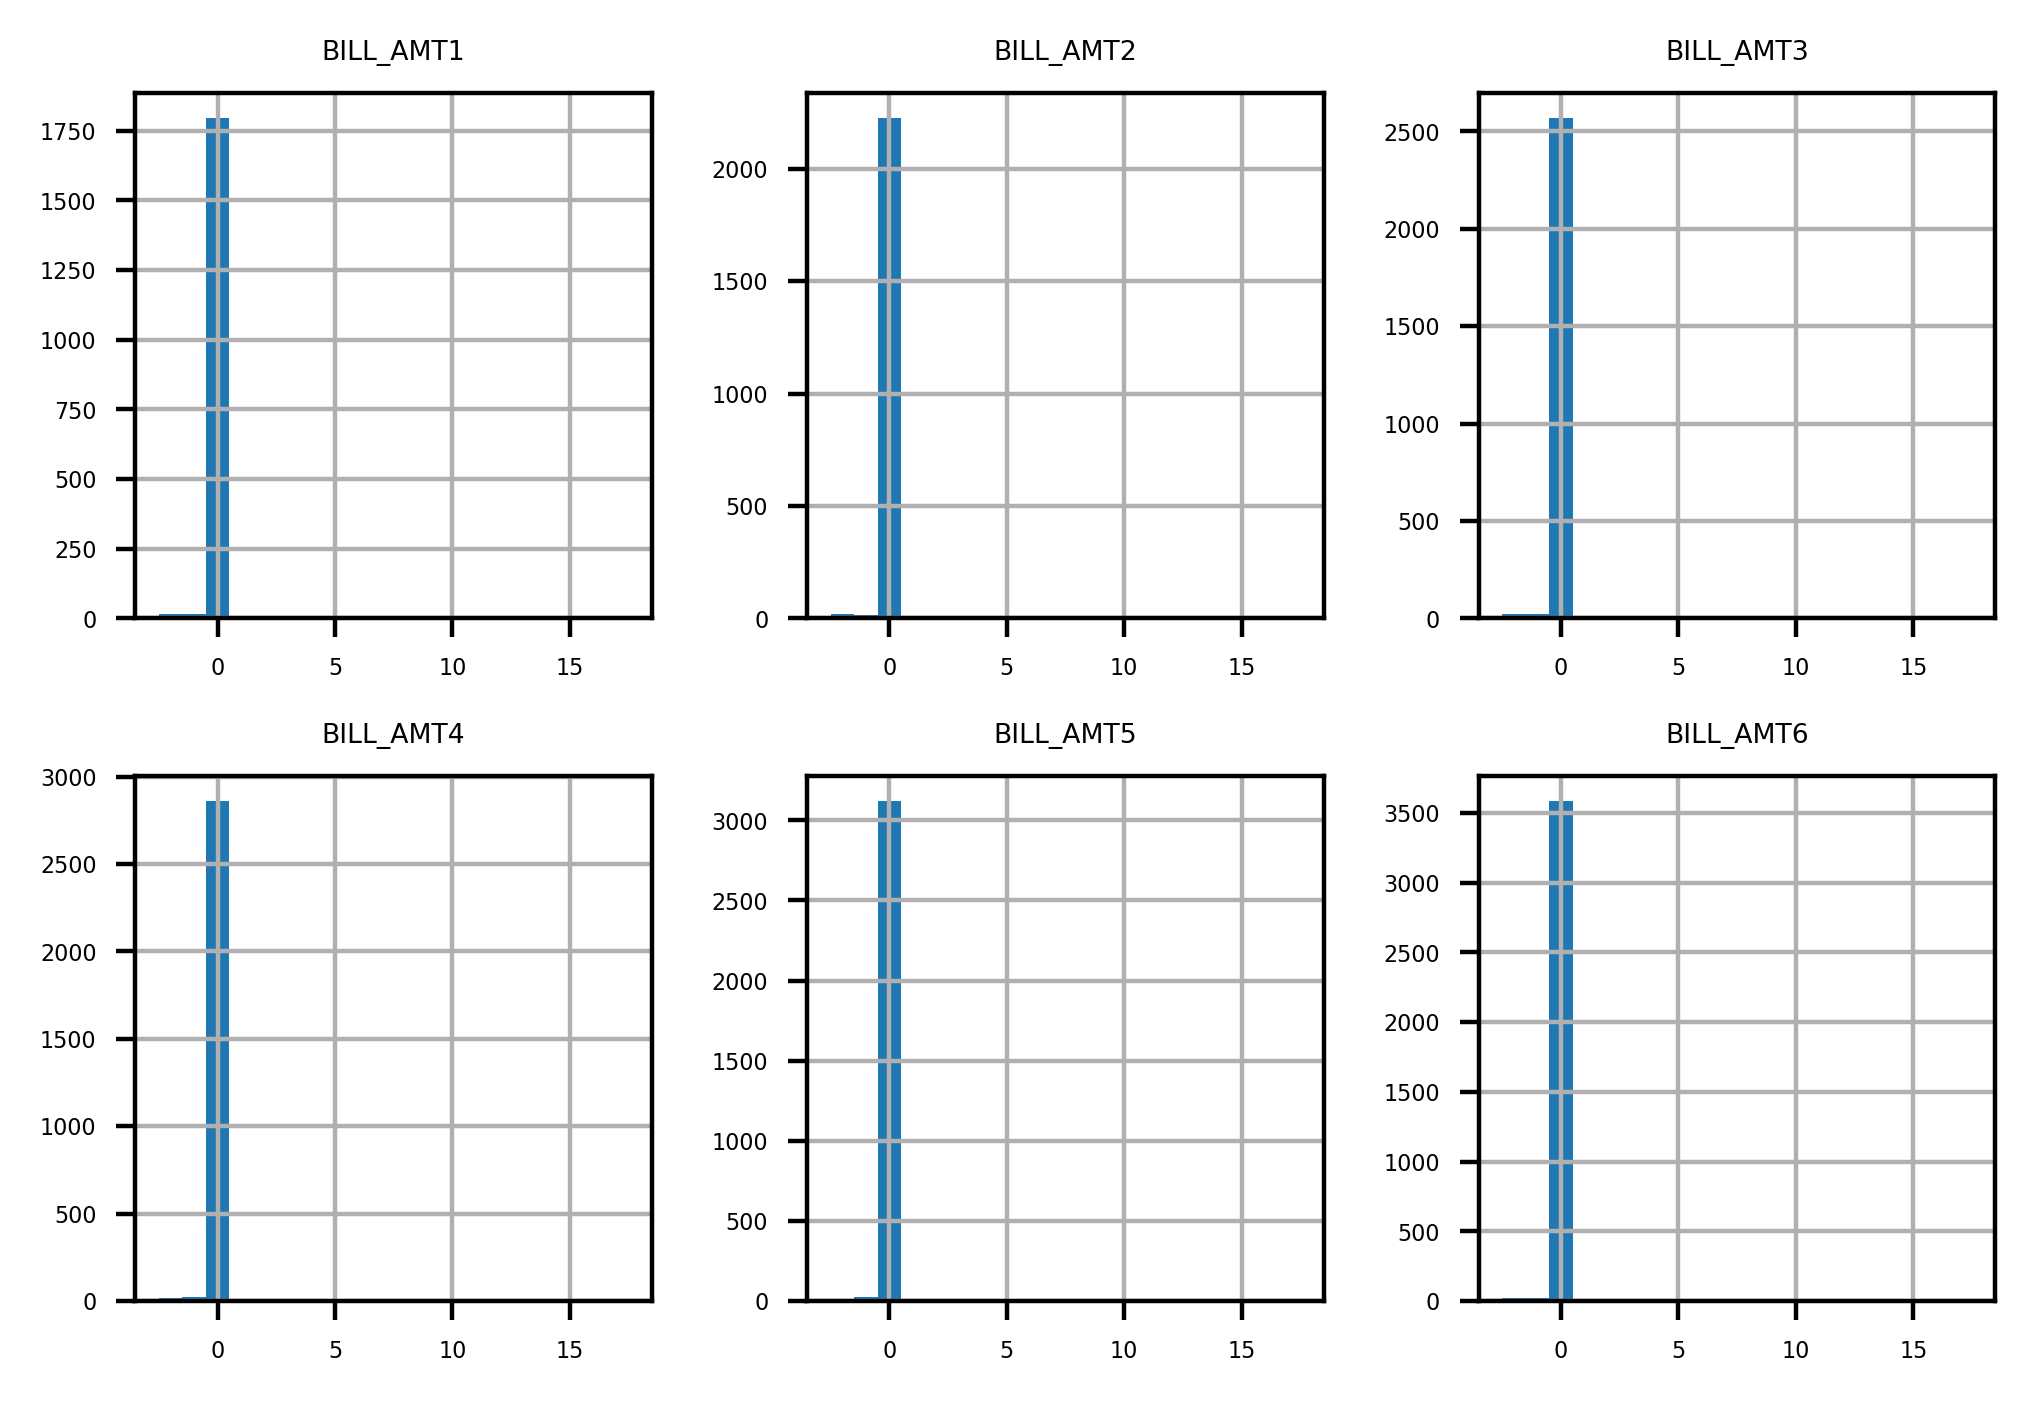

In [96]:
mpl.rcParams['font.size'] = 4
df[bill_list].hist(bins=pay_2_bins, layout=(2, 3))

In [93]:
# 4 - Obtenha o resumo de .describe() para as características de valor do pagamento.
# Faz sentido?

df[previous_pay_list].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


Pagamento mínimos iguais a 0 (faz sentido, ou o cara não paga nada (zero dólar) ou paga qualquer valor)

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

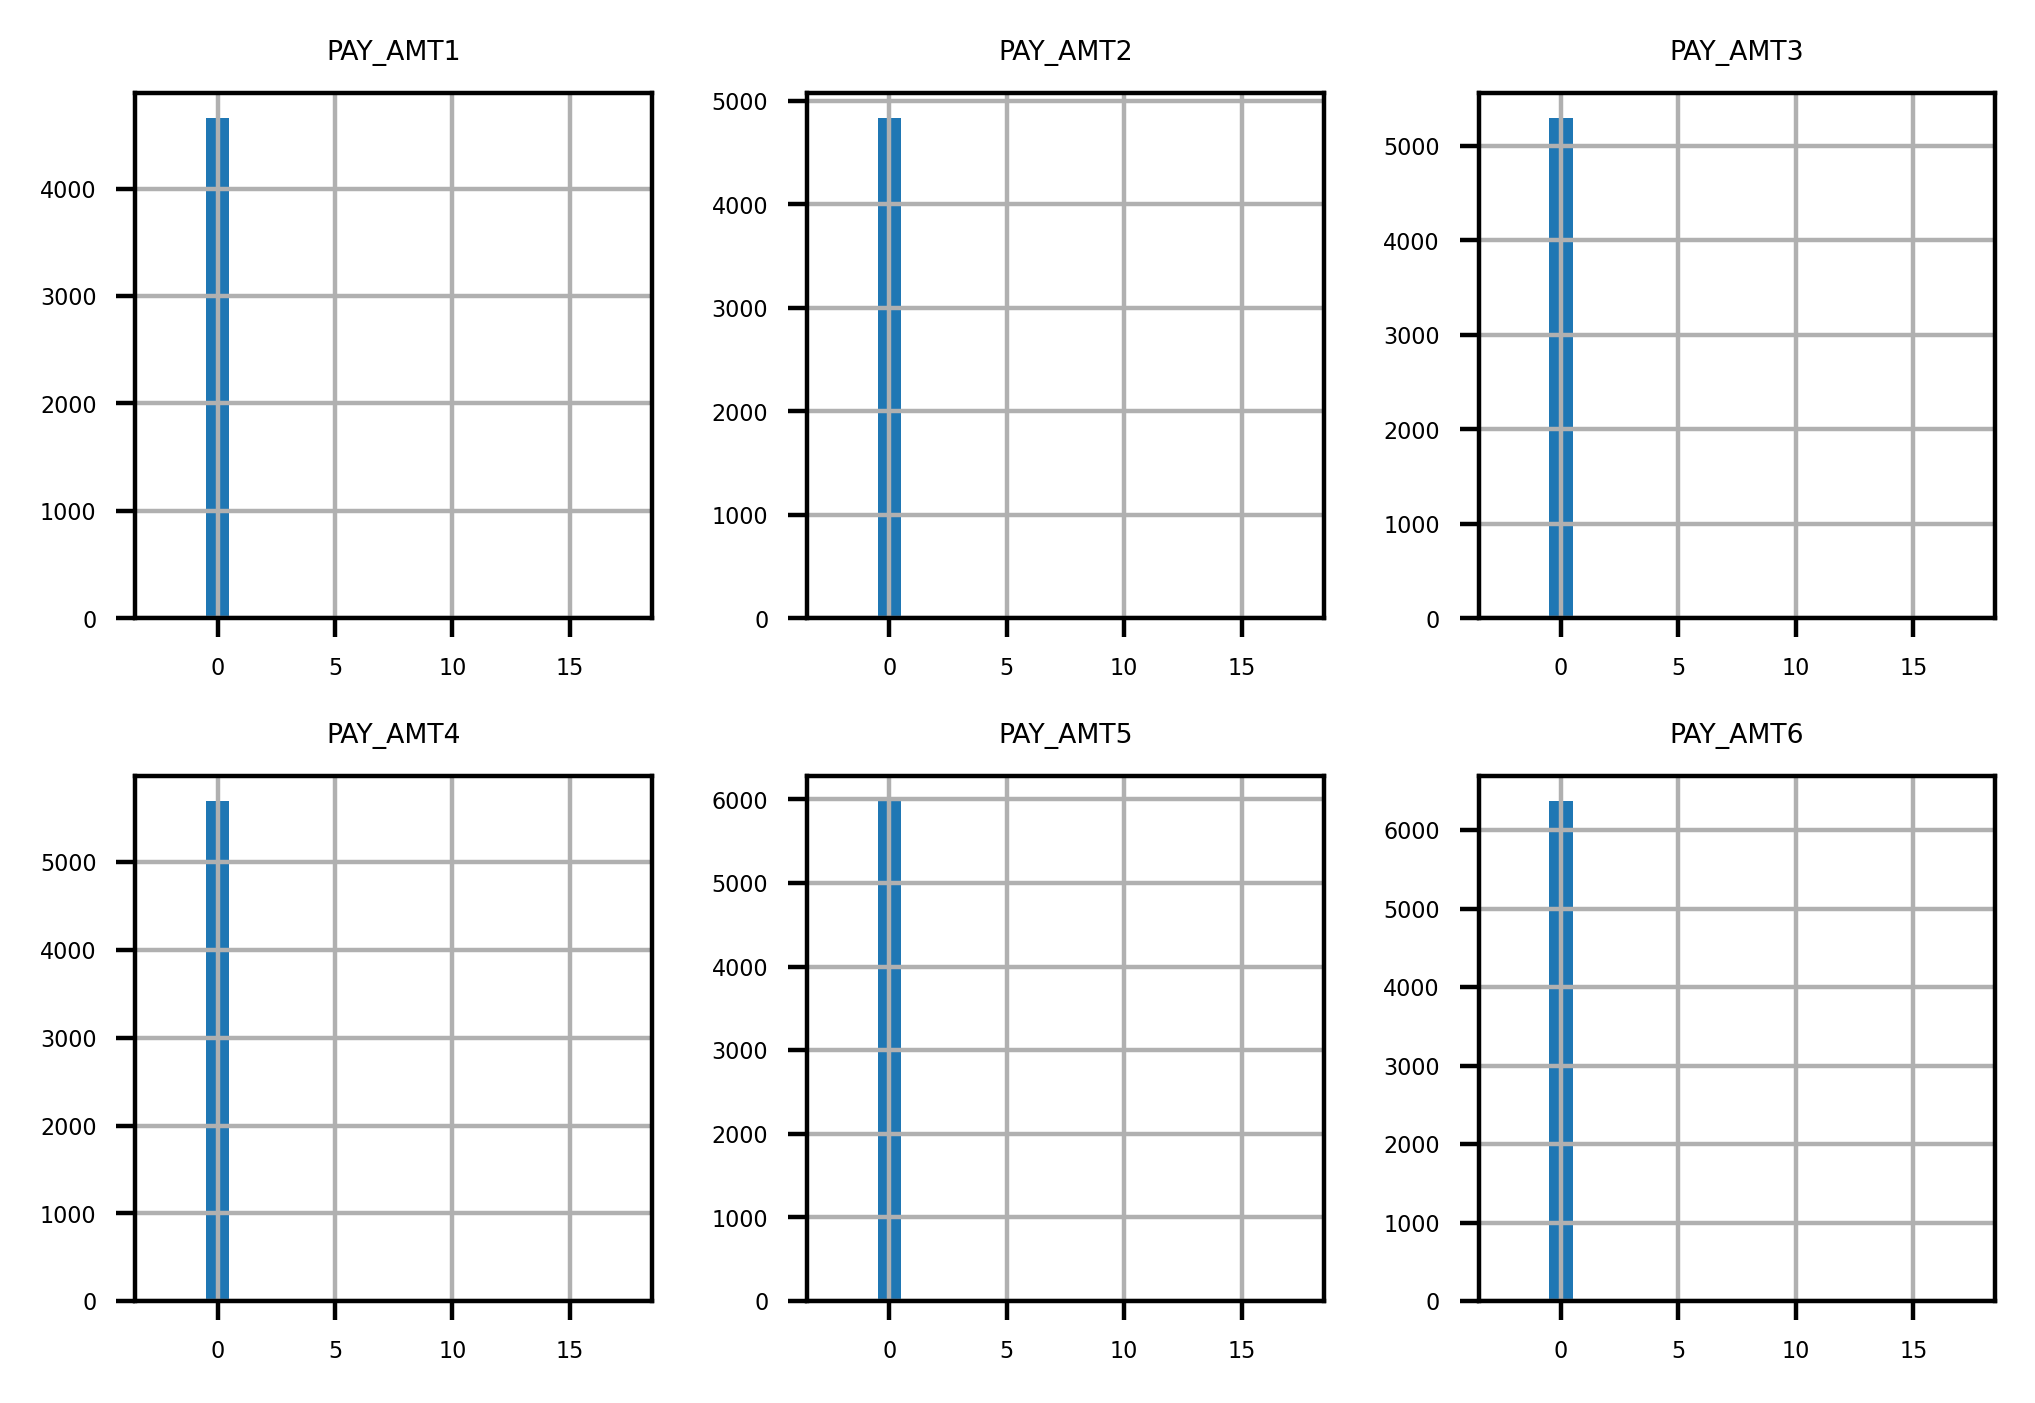

In [97]:
# 5 - Plote um histograma das características de pagamento da fatura (página 65)

mpl.rcParams['font.size'] = 4
df[previous_pay_list].hist(bins=pay_1_bins, layout=(2, 3))

In [103]:
# 6 - use uma máscara booleana para ver quantos dos dados de valor do pagamento são iguais a 0

#df['PAY_AMT1'].value_counts()
df[previous_pay_list].value_counts()  # E agora, José??

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0         0         0         0         0         0           1278
1000      0         0         0         0         0             42
390       390       390       390       390       390           22
2000      2000      2000      2000      2000      2000          20
2500      0         0         0         0         0             18
                                                              ... 
4054      2866      4082      4697      1735      0              1
          4444      1420      1398      1345      3265           1
4055      0         0         0         0         150            1
                    1767      3683      0         1817           1
2431      1261      2431      904       2191      0              1
Length: 24875, dtype: int64

In [ ]:
# 7 - ignorando os pagamentos iguais a 0, utilize o método .apply() do pandas e np.log10() do numpy para plotar
# histogramas de transformações logarítmicas dos pagamentos diferentes de zero.
# Conseidere o resultado.
